In [164]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [165]:
verse19 = '/data1/practical-sose23/dataset-verse19/derivatives'
verse20 = '/data1/practical-sose23/dataset-verse20/derivatives'
master_df = pd.read_excel("/data1/practical-sose23/castellvi/team_repo/3D-Castellvi-Prediction/src/dataset/VerSe_masterlist.xlsx")

verse19_list = os.listdir(verse19)
verse20_list = os.listdir(verse20)

In [166]:
master_df


,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L,Split,Comment
0,4,sub-verse004,0,NaN,True,L5,NaN,NaN
1,5,sub-verse005,0,NaN,True,L5,NaN,NaN
2,6,sub-verse006,0,NaN,True,L5,NaN,NaN
3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,sub-verse008,0,NaN,True,L5,NaN,NaN
...,...,...,...,...,...,...,...,...
320,824,sub-verse824,0,NaN,True,L5,NaN,NaN
321,825,sub-verse825,0,NaN,True,L5,NaN,NaN
322,826,sub-verse826,0,NaN,True,L5,NaN,NaN
323,833,sub-verse833,2b,NaN,True,L5,NaN,NaN


In [167]:
# drop rows if the Castellvi value is "4" but the values are strings so compare to "4"
master_df = master_df[master_df['Castellvi'].astype(str) != "4"]

In [168]:
# number of Nan values in each column
master_df.isna().sum()

Id              0
Full_Id        41
Castellvi      32
2a/3a Side    270
Sacrum Seg     41
Last_L         41
Split         318
Comment       318
dtype: int64

In [169]:
# Show the rows with Nan values
master_df[master_df.isna().any(axis=1)]
# Convert all Nan values to None
master_df = master_df.where(pd.notnull(master_df), None)
master_df

,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L,Split,Comment
0,4,sub-verse004,0,None,True,L5,NaN,NaN
1,5,sub-verse005,0,None,True,L5,NaN,NaN
2,6,sub-verse006,0,None,True,L5,NaN,NaN
3,7,None,None,None,None,None,NaN,NaN
4,8,sub-verse008,0,None,True,L5,NaN,NaN
...,...,...,...,...,...,...,...,...
320,824,sub-verse824,0,None,True,L5,NaN,NaN
321,825,sub-verse825,0,None,True,L5,NaN,NaN
322,826,sub-verse826,0,None,True,L5,NaN,NaN
323,833,sub-verse833,2b,None,True,L5,NaN,NaN


In [170]:
# drop split and Comment column
master_df = master_df.drop(columns=['Split', 'Comment'])

In [171]:
# drop rows with no Castellvi value :( or None)
master_df = master_df[master_df['Full_Id'].astype(str) != "None"]
master_df

,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L
0,4,sub-verse004,0,None,True,L5
1,5,sub-verse005,0,None,True,L5
2,6,sub-verse006,0,None,True,L5
4,8,sub-verse008,0,None,True,L5
5,9,sub-verse009,0,None,True,L5
...,...,...,...,...,...,...
320,824,sub-verse824,0,None,True,L5
321,825,sub-verse825,0,None,True,L5
322,826,sub-verse826,0,None,True,L5
323,833,sub-verse833,2b,None,True,L5


In [172]:
# count None values in each column
master_df.isna().sum()

Id              0
Full_Id         0
Castellvi       0
2a/3a Side    229
Sacrum Seg      0
Last_L          0
dtype: int64

0     144
2a     34
2b     26
3b     23
1b     21
1a     15
3a     14
Name: Castellvi, dtype: int64

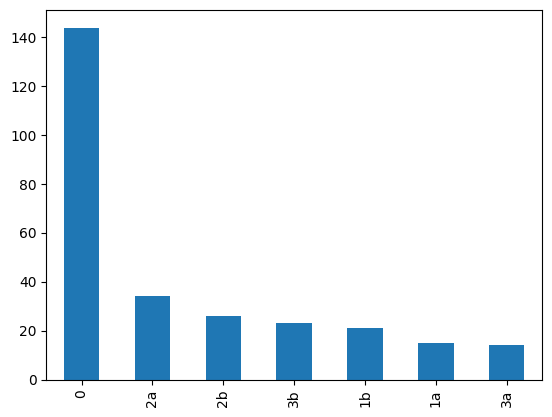

In [173]:
# plot the distribution of 2a,2b,3a,3b to other cases (show sum of 2a,2b,3a,3b) : 
master_df['Castellvi'].value_counts().plot(kind='bar') # show sum of 2a,2b,3a,3b
master_df['Castellvi'].value_counts()

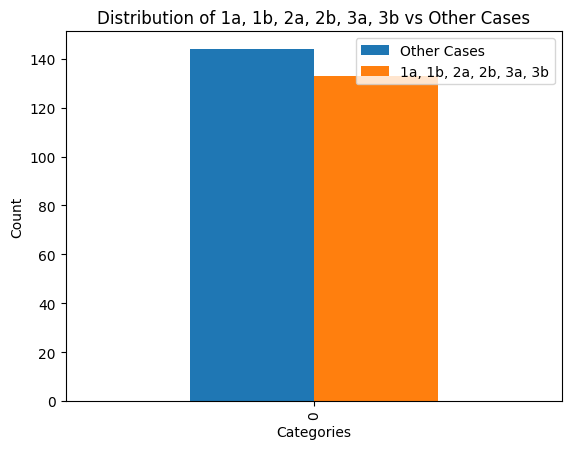

In [174]:
import matplotlib.pyplot as plt

# Calculate the sum of 2a, 2b, 3a, and 3b within the 'Castellvi' column
sum_2a_2b_3a_3b = master_df['Castellvi'].isin(['1a', '1b', '2a', '2b', '3a', '3b']).sum()

# Calculate the counts of each value in the 'Castellvi' column except for 2a, 2b, 3a, and 3b
value_counts = master_df['Castellvi'].loc[~master_df['Castellvi'].isin(['1a', '1b', '2a', '2b', '3a', '3b'])].value_counts()

# Create a new DataFrame with the sum and other value counts
plot_data = pd.DataFrame({'Other Cases': value_counts, '1a, 1b, 2a, 2b, 3a, 3b': sum_2a_2b_3a_3b}, index=value_counts.index)

# Plot the bar chart
plot_data.plot(kind='bar')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of 1a, 1b, 2a, 2b, 3a, 3b vs Other Cases')

# Show the plot
plt.show()

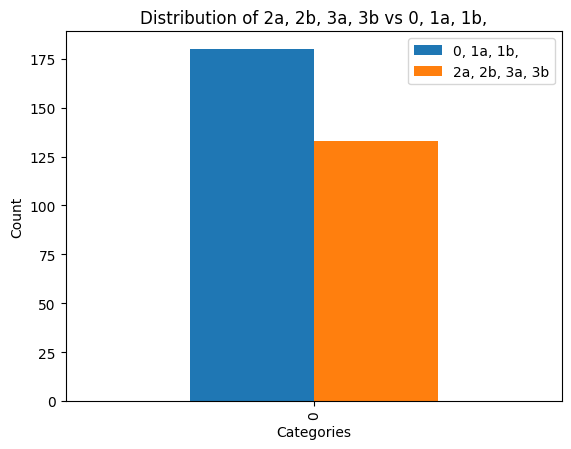

In [175]:
import matplotlib.pyplot as plt

# Calculate the sum of 2a, 2b, 3a, and 3b within the 'Castellvi' column
sum_0_1a_1b = master_df['Castellvi'].isin(['1a', '1b',0]).sum()

sum_2a_2b_3a_3b = master_df['Castellvi'].isin(['1a', '1b', '2a', '2b', '3a', '3b']).sum()

# Create a new DataFrame with the sum and other value counts
plot_data = pd.DataFrame({'0, 1a, 1b, ': sum_0_1a_1b, '2a, 2b, 3a, 3b': sum_2a_2b_3a_3b}, index=value_counts.index)

# Plot the bar chart
plot_data.plot(kind='bar')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of 2a, 2b, 3a, 3b vs 0, 1a, 1b,')

# Show the plot
plt.show()

<Axes: >

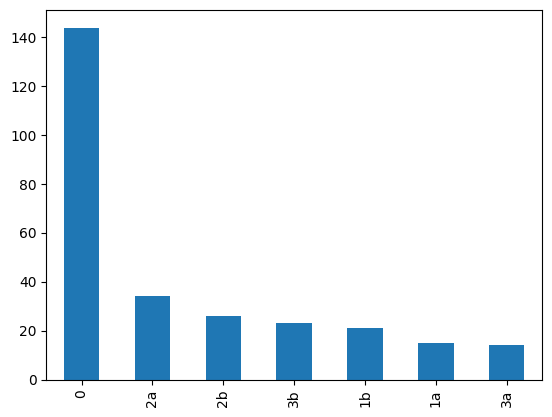

In [176]:
Dataset = []
Split = []
master_df['Castellvi'].value_counts().plot(kind='bar')

In [177]:
for i in master_df.Full_Id:
    if i in verse19_list:
        Dataset.append('VerSe19')
    elif i in verse20_list:
        Dataset.append('VerSe20')
    else:
        Dataset.append(None)
#Dataset

## Merge 1 cases with zeros

In [178]:
# replace all 1a and 1b classes with 0
master_df['Castellvi'] = master_df['Castellvi'].replace(['1a', '1b', 0], '0')

In [179]:
df = master_df.copy()

In [180]:
df

,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L
0,4,sub-verse004,0,None,True,L5
1,5,sub-verse005,0,None,True,L5
2,6,sub-verse006,0,None,True,L5
4,8,sub-verse008,0,None,True,L5
5,9,sub-verse009,0,None,True,L5
...,...,...,...,...,...,...
320,824,sub-verse824,0,None,True,L5
321,825,sub-verse825,0,None,True,L5
322,826,sub-verse826,0,None,True,L5
323,833,sub-verse833,2b,None,True,L5


In [181]:
# Assume df is your dataframe and 'Castellvi' is the column you want to stratify
# Split the data into 80% and 10% for training and val and 10% for testing
df['Castellvi'] = df['Castellvi'].astype(str)
train_df, test_df = train_test_split(df, test_size=0.1, stratify=df['Castellvi'], random_state=42)
# Further split the training data into 80% for training and 20% for validation
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['Castellvi'], random_state=42)



In [182]:
Split = []
for i in df.Full_Id:
    if i in train_df.Full_Id.values:
        Split.append('train')
    elif i in val_df.Full_Id.values:
        Split.append('val')
    elif i in test_df.Full_Id.values:
        Split.append('test')
    else:
        Split.append(None)

In [183]:
df['Split'] = Split
df 

,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L,Split
0,4,sub-verse004,0,None,True,L5,train
1,5,sub-verse005,0,None,True,L5,test
2,6,sub-verse006,0,None,True,L5,train
4,8,sub-verse008,0,None,True,L5,train
5,9,sub-verse009,0,None,True,L5,train
...,...,...,...,...,...,...,...
320,824,sub-verse824,0,None,True,L5,train
321,825,sub-verse825,0,None,True,L5,train
322,826,sub-verse826,0,None,True,L5,val
323,833,sub-verse833,2b,None,True,L5,train


In [184]:
# add a new column called flip. if the castellvi value is one of the 2a or 3a values, then flip value is 1, else 0
df['Flip'] = 0

In [185]:
df

,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L,Split,Flip
0,4,sub-verse004,0,None,True,L5,train,0
1,5,sub-verse005,0,None,True,L5,test,0
2,6,sub-verse006,0,None,True,L5,train,0
4,8,sub-verse008,0,None,True,L5,train,0
5,9,sub-verse009,0,None,True,L5,train,0
...,...,...,...,...,...,...,...,...
320,824,sub-verse824,0,None,True,L5,train,0
321,825,sub-verse825,0,None,True,L5,train,0
322,826,sub-verse826,0,None,True,L5,val,0
323,833,sub-verse833,2b,None,True,L5,train,0


In [186]:
train_df['Castellvi'].value_counts()


0     130
2a     24
2b     18
3b     17
3a     10
Name: Castellvi, dtype: int64

In [187]:
val_df['Castellvi'].value_counts()

0     32
2a     6
2b     5
3b     4
3a     3
Name: Castellvi, dtype: int64

In [188]:
test_df['Castellvi'].value_counts()

0     18
2a     4
2b     3
3b     2
3a     1
Name: Castellvi, dtype: int64

In [189]:
df

,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L,Split,Flip
0,4,sub-verse004,0,None,True,L5,train,0
1,5,sub-verse005,0,None,True,L5,test,0
2,6,sub-verse006,0,None,True,L5,train,0
4,8,sub-verse008,0,None,True,L5,train,0
5,9,sub-verse009,0,None,True,L5,train,0
...,...,...,...,...,...,...,...,...
320,824,sub-verse824,0,None,True,L5,train,0
321,825,sub-verse825,0,None,True,L5,train,0
322,826,sub-verse826,0,None,True,L5,val,0
323,833,sub-verse833,2b,None,True,L5,train,0


In [190]:
# Step 1: identify rows with 'Castellvi' as '2a' or '3a'
mask = df['Castellvi'].isin(['2a', '3a'])

# Step 2: make a copy of these rows
new_rows = df.loc[mask].copy()

# Step 3: set 'Flip' to 1 for these rows
new_rows['Flip'] = 1
# Update '2a/3a Side' column
new_rows['2a/3a Side'] = new_rows['2a/3a Side'].apply(lambda x: 'R' if x == 'L' else 'L')


# Step 4: append these new rows to the original DataFrame
df = pd.concat([df, new_rows], ignore_index=True)

# optionally, you can sort by 'Id' to have the duplicated entries directly below the original ones
df = df.sort_values(by='Id').reset_index(drop=True)


In [191]:
df

,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L,Split,Flip
0,4,sub-verse004,0,None,True,L5,train,0
1,5,sub-verse005,0,None,True,L5,test,0
2,6,sub-verse006,0,None,True,L5,train,0
3,8,sub-verse008,0,None,True,L5,train,0
4,9,sub-verse009,0,None,True,L5,train,0
...,...,...,...,...,...,...,...,...
320,824,sub-verse824,0,None,True,L5,train,0
321,825,sub-verse825,0,None,True,L5,train,0
322,826,sub-verse826,0,None,True,L5,val,0
323,833,sub-verse833,2b,None,True,L5,train,0


In [192]:
df.to_excel("VerSe_masterlist_V3.xlsx")

In [201]:
masterlist = pd.read_excel("VerSe_masterlist_V3.xlsx", index_col=0)
masterlist = masterlist.loc[masterlist['Split'] == 'test'] # extract test subjects
masterlist = masterlist.loc[masterlist['Flip'] == 0] # extract subjects with Flip = 0
test_subjects = masterlist.index.tolist()
test_subjects

[1,
 19,
 28,
 67,
 91,
 94,
 108,
 113,
 120,
 123,
 124,
 133,
 143,
 152,
 154,
 169,
 184,
 187,
 209,
 219,
 221,
 231,
 237,
 253,
 270,
 289,
 291,
 324]

In [202]:
masterlist.loc[masterlist['Split'] == 'test']

,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L,Split,Flip
1,5,sub-verse005,0,NaN,True,L5,test,0
19,32,sub-verse032,0,NaN,True,L5,test,0
28,46,sub-verse046,0,NaN,True,L5,test,0
67,101,sub-verse101,0,NaN,True,L5,test,0
91,145,sub-verse145,0,NaN,True,L5,test,0
94,149,sub-verse149,0,NaN,True,L5,test,0
108,400,sub-verse400_split-verse155,0,NaN,True,L5,test,0
113,405,sub-verse405_split-verse259,0,NaN,True,L5,test,0
120,412,sub-verse412_split-verse290,0,NaN,True,L5,test,0
123,415,sub-verse415_split-verse275,0,NaN,True,L5,test,0
